In [71]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from astropy import units as u
from astropy import constants as const

## Using some dummy data (mostly A) for the plots

### Mainly A_p = 1e16 (km/s/pc^2)

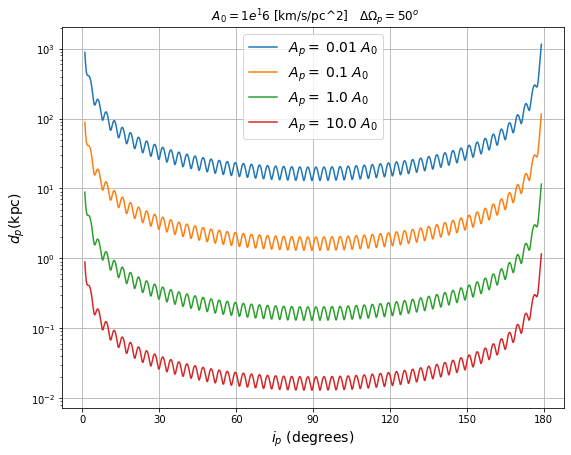

In [149]:
#Initial parameters
#inclination angle
ip = np.linspace(1,179,10000);

#Delta Omega (degrees to rad)
DOd = 50
DO = DOd / 180 * np.pi;

#pulsar radial velocity amplitude
#Taken from M. Kramer et al., Strong-Field Gravity Tests with the Double Pulsar, Phys. Rev. X 11, 041050 (2021).
p_orb_p = 0.102 * u.day
asini_p = 1.41502860 * const.c * u.s
Kp = 2.*np.pi * asini_p / p_orb_p


#Effective distance (in pc) (from Rickett paper)
deff = 0.805 * u.pc;
#Modulation coefficient (I just gave it a value)
ladder = [1e-2, 1e-1, 1e0, 1e1];
A = 1e16 * u.km/u.s/u.pc**0.5 * ladder;

#distance relation
dts = 86400 * u.d / u.s
kmm = 1e3 * u.km / u.m

plt.figure(figsize=(9,7))
for i in range(0,len(A)):
    
    dp = Kp * cosDO * np.sqrt(deff) / A[i] / np.sin(ip / 180 * np.pi) * np.sqrt( np.cos(DO)**2 + np.sin(DO)**2 * np.cos(ip)**2 )* dts * kmm /1000 # to kpc;
    
    #plotting function
    fntsize = 14;
    plt.plot(ip, dp, label = '$A_p = \: $' +str(ladder[i]) + ' $A_0$')
    plt.grid(); plt.legend(fontsize = fntsize)

plt.xlabel('$i_p$' + ' (degrees)', fontsize = fntsize)
plt.ylabel('$d_p$' + '(kpc)', fontsize = fntsize)
plt.title(" $A_0 = 1e^16$" + " [km/s/pc^2]" + "$ \quad \Delta \Omega_p =$" + str(DOd ) +"$ ^o$")
plt.grid(); plt.legend(fontsize = fntsize); plt.yscale('log')
plt.xticks([0 ,30, 60, 90, 120, 150, 180])      
plt.savefig("distance as a func of i log 50.jpg")

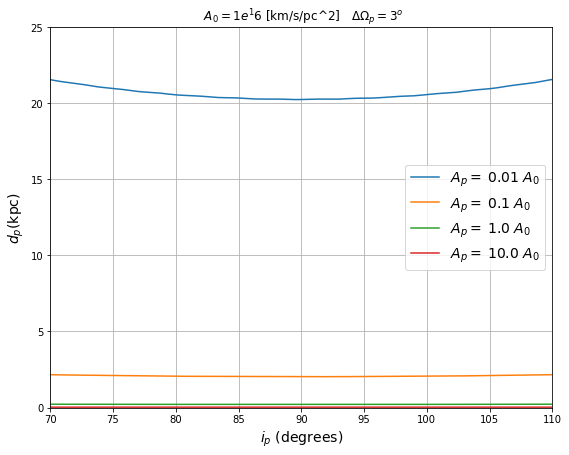

In [144]:
plt.figure(figsize=(9,7))
for i in range(0,len(A)):
    
    dp = Kp  * np.sqrt(deff) / A[i] / np.sin(ip / 180 * np.pi) * np.sqrt( np.cos(DO)**2 + np.sin(DO)**2 * np.cos(ip)**2 ) * dts * kmm /1000 # to kpc;
    
    #plotting function
    fntsize = 14;
    plt.plot(ip, dp, label = '$A_p = \: $' +str(ladder[i]) + ' $A_0$')
    plt.grid(); plt.legend(fontsize = fntsize)

plt.xlabel('$i_p$' + ' (degrees)', fontsize = fntsize)
plt.ylabel('$d_p$' + '(kpc)', fontsize = fntsize)
plt.title(" $A_0 = 1e^16$" + " [km/s/pc^2]" + "$ \quad \Delta \Omega_p =$" + str(DOd ) +"$ ^o$")
plt.grid(); plt.legend(fontsize = fntsize)
# plt.xticks([70, 80, 90, 100, 110])
plt.xlim([70,110])
plt.ylim([0, 25])
plt.savefig("distance as a func of i.jpg")

## Plot of the sine of $i_p$

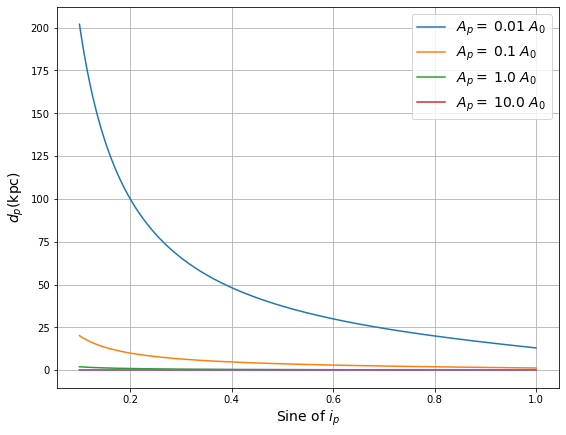

In [125]:
sinip = np.linspace(0.1,1,1000)

plt.figure(figsize=(9,7))
for i in range(0,len(A)):
    
    dp = Kp * np.sqrt( np.cos(DO)**2 + np.sin(DO)**2 * (1-sinip**2) ) * np.sqrt(deff) / A[i] / sinip * dts * kmm /1000 # to kpc;
    
    #plotting function
    fntsize = 14;
    plt.plot(sinip, dp, label = '$A_p = \: $' +str(ladder[i]) + ' $A_0$')
    plt.grid(); plt.legend(fontsize = fntsize)

plt.plot(sinip, dp, label = '$d_p ( i_p)')
plt.grid()
plt.xlabel('Sine of '+'$i_p$', fontsize = fntsize)
plt.ylabel('$d_p$' + '(kpc)', fontsize = fntsize)
#plt.yscale('log')
plt.savefig("distance as a func of sini.jpg")

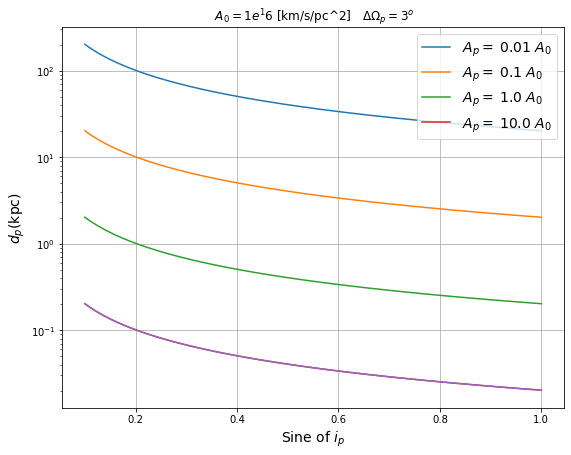

In [145]:
sinip = np.linspace(0.1,1,1000)

plt.figure(figsize=(9,7))
for i in range(0,len(A)):
    
    dp = Kp * cosDO * np.sqrt(deff) / A[i] / sinip * dts * kmm /1000 # to kpc;
    
    #plotting function
    fntsize = 14;
    plt.plot(sinip, dp, label = '$A_p = \: $' +str(ladder[i]) + ' $A_0$')
    plt.grid(); plt.legend(fontsize = fntsize)

plt.plot(sinip, dp, label = '$d_p ( i_p)')
plt.grid()
plt.xlabel('Sine of '+'$i_p$', fontsize = fntsize)
plt.ylabel('$d_p$' + '(kpc)', fontsize = fntsize)
plt.yscale('log')
plt.title(" $A_0 = 1e^16$" + " [km/s/pc^2]" + "$ \quad \Delta \Omega_p =$" + str(DOd ) +"$ ^o$")
plt.savefig("distance as a func of sini log.jpg")

## Unknown DO

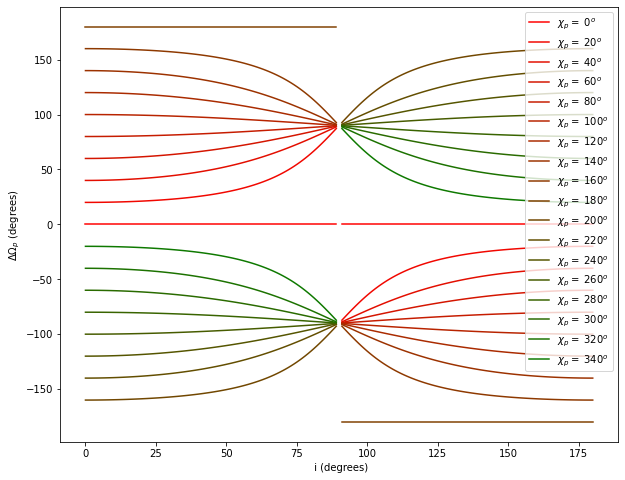

In [247]:
#Asume chi_p was fitted to chi degrees
chi_grand = np.arange(0, 360, 20)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
import matplotlib as mpl

plt.figure(figsize=(10,8))
# def get_cmap(n, name='hsv'):
#     '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
#     RGB color; the keyword argument name must be a standard mpl colormap name.'''
#     return plt.cm.get_cmap(name, n)
# cmap = get_cmap(len(ip))
for j in range(0, len(chi_grand)):
    chi = chi_grand[j]
    #degeneracy to a 180 rotation
    chi_p =  (chi )  % 360 
    chi_p *= np.pi/180

    #generating and separating i
    ip = np.linspace(0, 180, 181)
    ii_ccw = (ip < 90)
    ii_cw =  (ip >  90)



    DOp1 = np.arctan2(np.sin(chi_p) / np.cos(ip[ii_ccw] * np.pi/180),np.cos(chi_p))
    DOp2 = np.arctan2(np.sin(chi_p) / np.cos(ip[ii_cw] * np.pi/180),np.cos(chi_p))
    plt.plot(ip[ii_ccw], DOp1 * 180 / np.pi, color=colorFader(c1,c2,j/len(chi_grand)) ,label = '$\chi_p =$ ' + str(chi)+ '$^o$' )
    plt.plot(ip[ii_cw], DOp2 * 180 / np.pi, color=colorFader(c1,c2,j/len(chi_grand)) )


plt.legend()
plt.ylabel('$\\Delta \\Omega_p$' + ' (degrees)')
plt.xlabel(' i (degrees)')
plt.savefig("DO i.jpg")

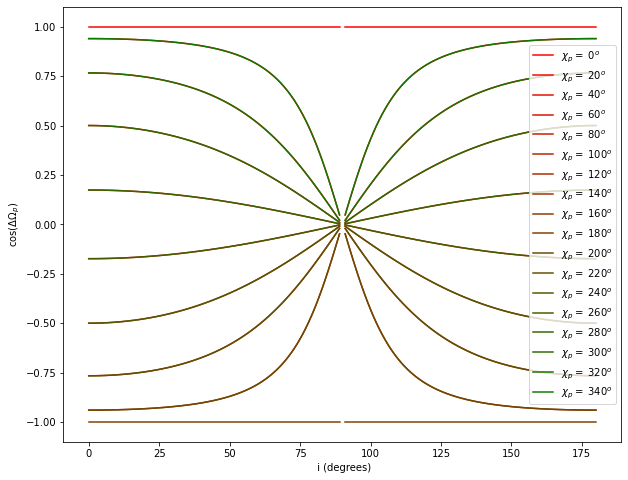

In [248]:
#Asume chi_p was fitted to chi degrees
chi_grand = np.arange(0, 360, 20)

plt.figure(figsize=(10,8))

import matplotlib as mpl


for j in range(0, len(chi_grand)):
    chi = chi_grand[j]
    #degeneracy to a 180 rotation
    chi_p =  (chi )  % 360 
    chi_p *= np.pi/180

    #generating and separating i
    ip = np.linspace(0, 180, 181)
    ii_ccw = (ip < 90)
    ii_cw =  (ip >  90)


    DOp1 = np.arctan2(np.sin(chi_p) / np.cos(ip[ii_ccw] * np.pi/180),np.cos(chi_p))
    DOp2 = np.arctan2(np.sin(chi_p) / np.cos(ip[ii_cw] * np.pi/180),np.cos(chi_p))
    plt.plot(ip[ii_ccw], np.cos(DOp1), color=colorFader(c1,c2,j/len(chi_grand)) ,label = '$\chi_p =$ ' + str(chi)+ '$^o$' )
    plt.plot(ip[ii_cw], np.cos(DOp2 ), color=colorFader(c1,c2,j/len(chi_grand)) )


plt.legend()
plt.ylabel('$\cos (\\Delta \\Omega_p)$')
plt.xlabel(' i (degrees)')
plt.savefig("cosDO i.jpg")

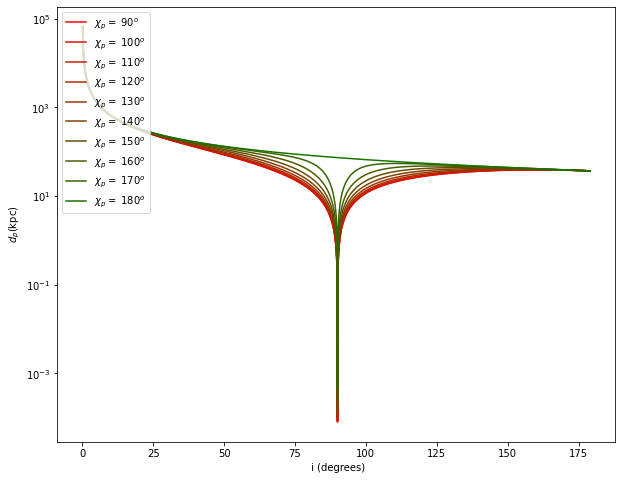

In [301]:
#Asume chi_p was fitted to chi degrees
chi_grand = np.arange(90, 181, 10)

plt.figure(figsize=(10,8))

A = 1e15 * u.km/u.s/u.pc**0.5
ip = np.linspace(0.1,179,100000) * np.pi/180;

import matplotlib as mpl

for j in range(0, len(chi_grand)):
    chi = chi_grand[j]
    #degeneracy to a 180 rotation
    chi_p =  (chi )  % 360 
    chi_p *= np.pi/180

    #generating and separating i
    
    ii_ccw = (ip < 90)
    ii_cw =  (ip >  90)


    DOp1 = np.arctan2(np.sin(chi_p) / np.cos(ip[ii_ccw] * np.pi/180),np.cos(chi_p))
    DOp2 = np.arctan2(np.sin(chi_p) / np.cos(ip[ii_cw] * np.pi/180),np.cos(chi_p))
    
    dp1 = Kp *  np.sqrt(deff) / A / np.sin(ip[ii_ccw] / 180 * np.pi) * np.sqrt ((1-np.sin(ip[ii_ccw])**2) / (1-np.sin(ip[ii_ccw])**2 * np.cos(chi_p)**2)) * dts * kmm /1000
    dp2 = Kp *  np.sqrt(deff) / A / np.sin(ip[ii_cw] / 180 * np.pi) * np.sqrt ((1-np.sin(ip[ii_cw])**2) / (1-np.sin(ip[ii_cw])**2 * np.cos(chi_p)**2)) * dts * kmm /1000
    
    #dp1 =Kp * np.cos(DOp1) * np.sqrt(deff) / A / np.sin(ip[ii_ccw] / 180 * np.pi) * np.sqrt( np.cos(DOp1)**2 + np.sin(DOp1)**2 * np.cos(ip[ii_ccw])**2 )* dts * kmm /1000 #
    #dp2 = Kp * np.cos(DOp2) * np.sqrt(deff) / A / np.sin(ip[ii_cw] / 180 * np.pi) * np.sqrt( np.cos(DOp2)**2 + np.sin(DOp2)**2 * np.cos(ip[ii_cw])**2 )* dts * kmm /1000 #
    
    plt.plot(ip[ii_ccw] *180 / np.pi, dp1, color=colorFader(c1,c2,j/len(chi_grand)) ,label = '$\chi_p =$ ' + str(chi)+ '$^o$' )
    plt.plot(ip[ii_cw] *180 / np.pi, dp2, color=colorFader(c1,c2,j/len(chi_grand)) )


plt.legend(loc = 'upper left'); 
plt.yscale('log')
plt.ylabel('$d_p$' + '(kpc)')
plt.xlabel(' i (degrees)')
#plt.savefig("cosDO i.jpg")
#plt.xlim([0,175])
#plt.ylim([1e-3, 1e3])

plt.savefig("dpAio2.jpg")